<a href="https://colab.research.google.com/github/GarciaDAndy/Challenge_Alura/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [146]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()




,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [8]:
df_tienda1 = tienda1 ['Precio'].sum()
print(f'La facturación de la tienda 1 es de {df_tienda1}')
df_tienda2 = tienda2 ['Precio'].sum()
print(f'La facturación de la tienda 2 es de {df_tienda2}')
df_tienda3 = tienda3 ['Precio'].sum()
print(f'La facturación de la tienda 3 es de {df_tienda3}')
df_tienda4  = tienda4 ['Precio'].sum()
print(f'La facturación de la tienda 4 es de {df_tienda4}')

#unificacion de datos para grafica
df_total = [df_tienda1, df_tienda2, df_tienda3, df_tienda4]
facturacion_total = pd.DataFrame({
    'Tienda 1': [df_tienda1],
    'Tienda 2': [df_tienda2],
    'Tienda 3': [df_tienda3],
    'Tienda 4': [df_tienda4]
})
print(facturacion_total)

La facturación de la tienda 1 es de 1150880400.0
La facturación de la tienda 2 es de 1116343500.0
La facturación de la tienda 3 es de 1098019600.0
La facturación de la tienda 4 es de 1038375700.0
       Tienda 1      Tienda 2      Tienda 3      Tienda 4
0  1.150880e+09  1.116344e+09  1.098020e+09  1.038376e+09


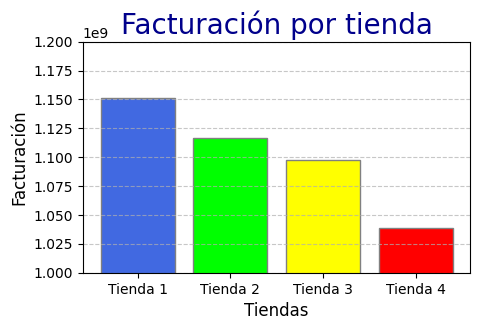

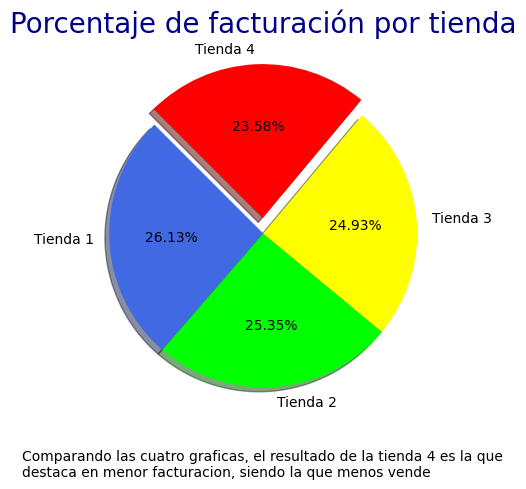

In [184]:
colores = ['royalblue','lime', 'yellow', 'red']
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plt.figure(figsize=(5, 3))
plt.bar(
    facturacion_total.columns,
    facturacion_total.iloc[0],
    color=colores,
    edgecolor='gray'
    )
plt.ylim(1e9, 1.2e9)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Facturación', fontsize=12)
plt.title('Facturación por tienda', fontsize=20, color='darkblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(5, 5))
explode = (0, 0, 0, 0.1)
plt.pie(
    facturacion_total.iloc[0],
    labels=nombres,
    autopct='%1.2f%%',
    colors=colores,
    explode=explode,
    shadow=True,
    startangle=135
    )

plt.title('Porcentaje de facturación por tienda', fontsize=20, color='darkblue')
plt.figtext(x=0.03,y=0.01,s='Comparando las cuatro graficas, el resultado de la tienda 4 es la que \ndestaca en menor facturacion, siendo la que menos vende')
plt.show()

# 2. Ventas por categoría

Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               410775800.0
Instrumentos musicales      77380900.0
Juguetes                    19401100.0
Libros         

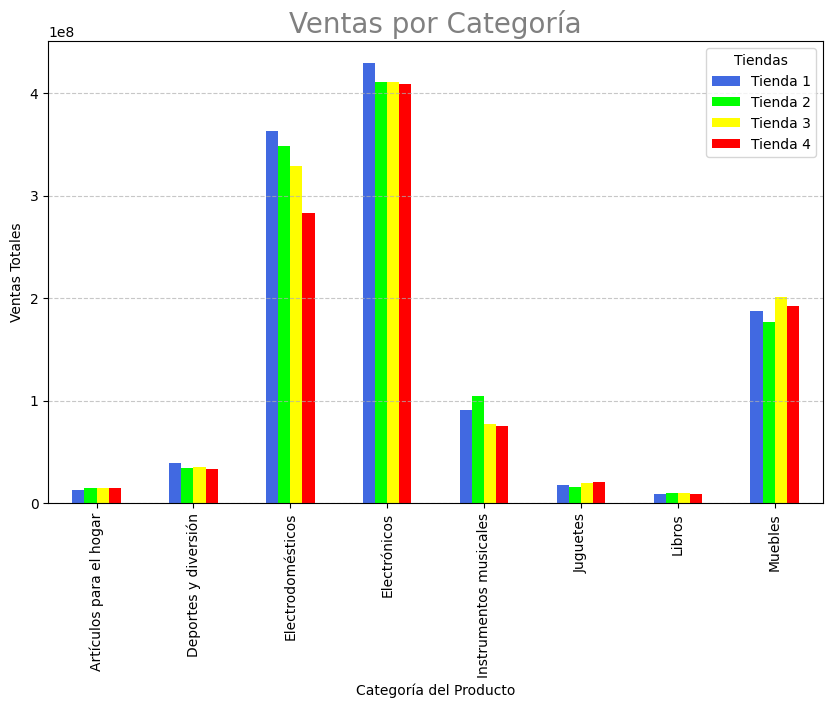

In [185]:
ventas_por_categoria1 = tienda1.groupby('Categoría del Producto')['Precio'].sum()
print(ventas_por_categoria1)
ventas_por_categoria2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
print(ventas_por_categoria2)
ventas_por_categoria3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
print(ventas_por_categoria3)
ventas_por_categoria4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()
print(ventas_por_categoria4)
df_ventas = pd.DataFrame({
    'Tienda 1': ventas_por_categoria1,
    'Tienda 2': ventas_por_categoria2,
    'Tienda 3': ventas_por_categoria3,
    'Tienda 4': ventas_por_categoria4
})
print(df_ventas)

df_ventas.plot(kind='bar', figsize=(10, 6),color=colores)
plt.title('Ventas por Categoría', fontsize=20, color='gray')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas Totales')
plt.legend(title='Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

# 3. Calificación promedio de la tienda


In [186]:
calificacion_promedio1 = tienda1['Calificación'].mean()
print(f'La calificación promedio de la tienda 1 es de {calificacion_promedio1.round(2)}')
calificacion_promedio2 = tienda2['Calificación'].mean()
print(f'La calificación promedio de la tienda 2 es de {calificacion_promedio2.round(2)}')
calificacion_promedio3 = tienda3['Calificación'].mean()
print(f'La calificación promedio de la tienda 3 es de {calificacion_promedio3.round(2)}')
calificacion_promedio4 = tienda4['Calificación'].mean()
print(f'La calificación promedio de la tienda 4 es de {calificacion_promedio4.round(2)}')


La calificación promedio de la tienda 1 es de 3.98
La calificación promedio de la tienda 2 es de 4.04
La calificación promedio de la tienda 3 es de 4.05
La calificación promedio de la tienda 4 es de 4.0


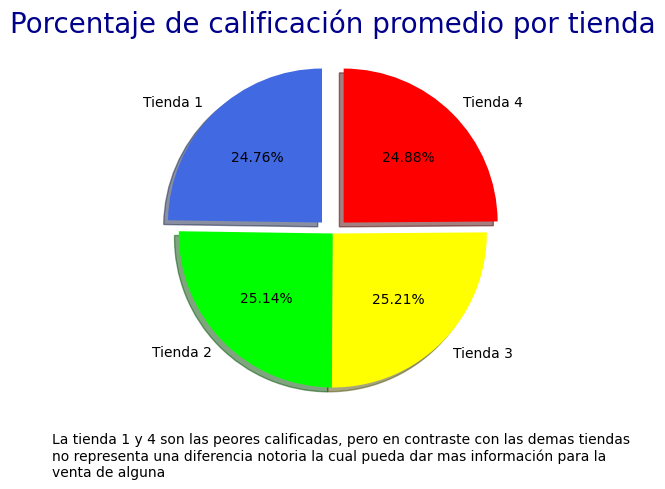

In [187]:
plt.figure(figsize=(5, 5))
explode2= (0.1, 0, 0, 0.1)
valores_calificacion = [calificacion_promedio1, calificacion_promedio2, calificacion_promedio3, calificacion_promedio4]
plt.pie(
    valores_calificacion,
    labels=nombres,
    autopct='%1.2f%%',
    colors=colores,
    shadow=True,
    explode=explode2,
    startangle=90
)
plt.title('Porcentaje de calificación promedio por tienda', fontsize=20, color='darkblue')
plt.figtext(x=-0.05,y=0.01,s='La tienda 1 y 4 son las peores calificadas, pero en contraste con las demas tiendas \nno representa una diferencia notoria la cual pueda dar mas información para la \nventa de alguna')
plt.show()

# 4. Productos más y menos vendidos

In [188]:
productos_agrupados1 = tienda1['Producto'].value_counts()
producto_mas_vendido1 = productos_agrupados1.idxmax()
numero_ventas_max1 = productos_agrupados1.max()
producto_menos_vendido1 = productos_agrupados1.idxmin()
numero_venta_min1 = productos_agrupados1.min()
print(f'El producto mas vendidos de la tienda 1 es: \n{producto_mas_vendido1}: {numero_ventas_max1} pz.\nEl producto menos vendido de la tienda 1 es: \n{producto_menos_vendido1}: {numero_venta_min1}')

productos_agrupados2 = tienda2['Producto'].value_counts()
producto_mas_vendido2 = productos_agrupados2.idxmax()
numero_ventas_max2 = productos_agrupados2.max()
producto_menos_vendido2 = productos_agrupados2.idxmin()
numero_venta_min2 = productos_agrupados2.min()
print(f'El producto mas vendidos de la tienda 2 es: \n{producto_mas_vendido2}: {numero_ventas_max2} pz.\nEl producto menos vendido de la tienda 2 es: \n{producto_menos_vendido2}: {numero_venta_min2}')

productos_agrupados3 = tienda3['Producto'].value_counts()
producto_mas_vendido3 = productos_agrupados3.idxmax()
numero_ventas_max3 = productos_agrupados3.max()
producto_menos_vendido3 = productos_agrupados3.idxmin()
numero_venta_min3 = productos_agrupados3.min()
print(f'El producto mas vendidos de la tienda 3 es: \n{producto_mas_vendido3}: {numero_ventas_max3} pz.\nEl producto menos vendido de la tienda 3 es: \n{producto_menos_vendido3}: {numero_venta_min3}')

productos_agrupados4 = tienda4['Producto'].value_counts()
producto_mas_vendido4 = productos_agrupados4.idxmax()
numero_ventas_max4 = productos_agrupados4.max()
producto_menos_vendido4 = productos_agrupados4.idxmin()
numero_venta_min4 = productos_agrupados4.min()
print(f'El producto mas vendidos de la tienda 4 es: \n{producto_mas_vendido4}: {numero_ventas_max4} pz.\nEl producto menos vendido de la tienda 4 es: \n{producto_menos_vendido4}: {numero_venta_min4}')


El producto mas vendidos de la tienda 1 es: 
Microondas: 60 pz.
El producto menos vendido de la tienda 1 es: 
Auriculares con micrófono: 33
El producto mas vendidos de la tienda 2 es: 
Iniciando en programación: 65 pz.
El producto menos vendido de la tienda 2 es: 
Juego de mesa: 32
El producto mas vendidos de la tienda 3 es: 
Kit de bancas: 57 pz.
El producto menos vendido de la tienda 3 es: 
Bloques de construcción: 35
El producto mas vendidos de la tienda 4 es: 
Cama box: 62 pz.
El producto menos vendido de la tienda 4 es: 
Guitarra eléctrica: 33


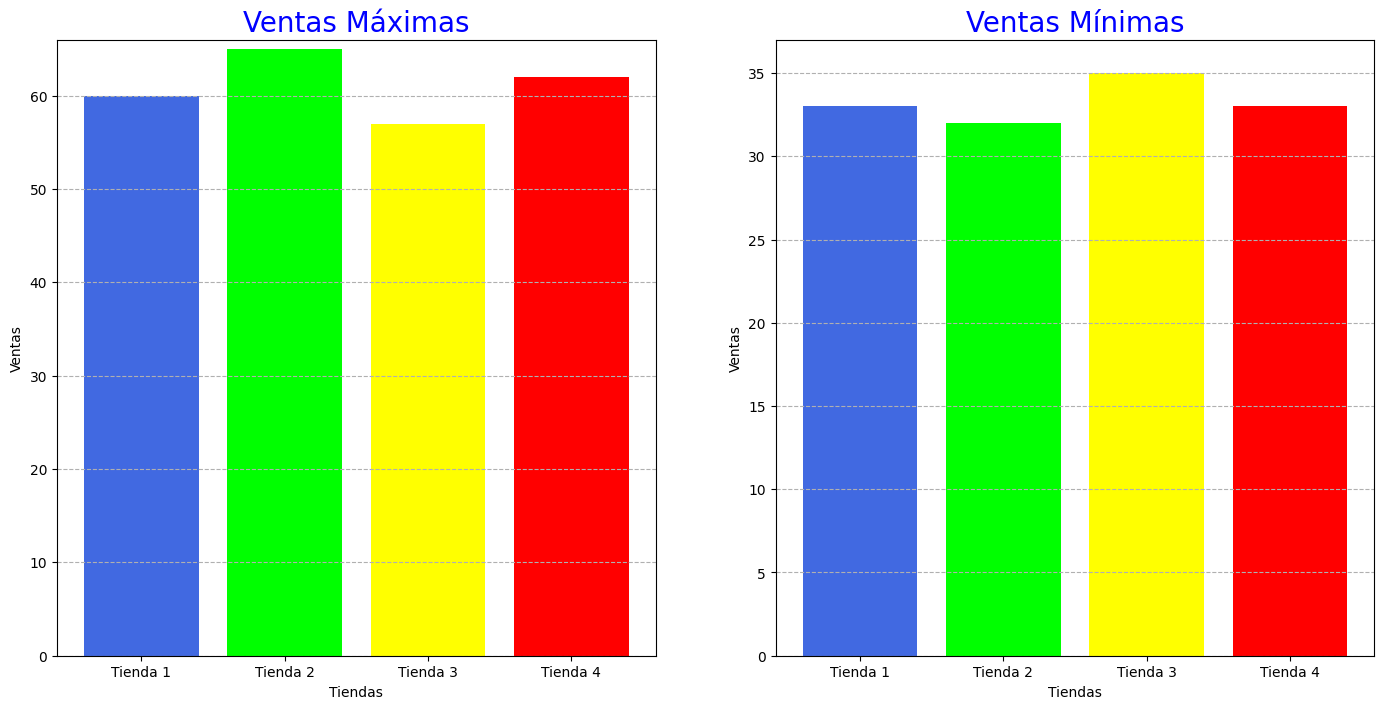

In [190]:
ventas_max= [numero_ventas_max1, numero_ventas_max2, numero_ventas_max3, numero_ventas_max4]
ventas_min = [numero_venta_min1, numero_venta_min2, numero_venta_min3, numero_venta_min4]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 8))
ax1.bar(nombres,ventas_max,color=colores)
ax1.set_ylabel('Ventas')
ax1.set_title('Ventas Máximas',fontsize=20, color='blue')
ax1.set_xlabel('Tiendas')
ax1.set_ylim(0, 66)
ax1.grid(axis='y', linestyle='--', alpha=1)

ax2.bar(nombres,ventas_min,color=colores)
ax2.set_ylabel('Ventas')
ax2.set_title('Ventas Mínimas', fontsize=20, color='blue')
ax2.set_xlabel('Tiendas')
ax2.set_ylim(0, 37)
ax2.grid(axis='y', linestyle='--', alpha=1)

plt.show()

# 5. Envío promedio por tienda

In [117]:
promedio_envio1 = tienda1['Costo de envío'].mean()
print(f'El promedio de envío de la tienda 1 es de {promedio_envio1.round(2)}')
promedio_envio2 = tienda2['Costo de envío'].mean()
print(f'El promedio de envío de la tienda 2 es de {promedio_envio2.round(2)}')
promedio_envio3 = tienda3['Costo de envío'].mean()
print(f'El promedio de envío de la tienda 3 es de {promedio_envio3.round(2)}')
promedio_envio4 = tienda4['Costo de envío'].mean()
print(f'El promedio de envío de la tienda 4 es de {promedio_envio4.round(2)}')
promedios_envios= [promedio_envio1, promedio_envio2, promedio_envio3, promedio_envio4]

El promedio de envío de la tienda 1 es de 26018.61
El promedio de envío de la tienda 2 es de 25216.24
El promedio de envío de la tienda 3 es de 24805.68
El promedio de envío de la tienda 4 es de 23459.46


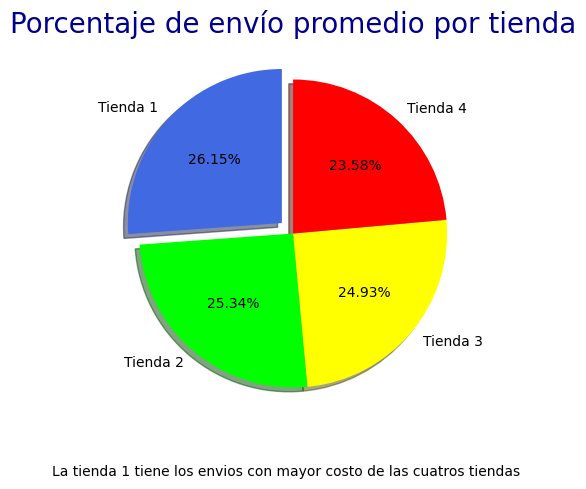

In [125]:
explode3= (0.1, 0, 0, 0)
plt.figure(figsize=(5,5))
plt.pie(
    promedios_envios,
    labels=nombres,
    autopct='%1.2f%%',
    colors=colores,
    shadow=True,
    startangle=90,
    explode=explode3
    )
plt.title('Porcentaje de envío promedio por tienda', fontsize=20, color='darkblue'
)
plt.figtext(x=0.03,y=0.01,s='La tienda 1 tiene los envios con mayor costo de las cuatros tiendas')
plt.show()

# **Paso** **Extra**

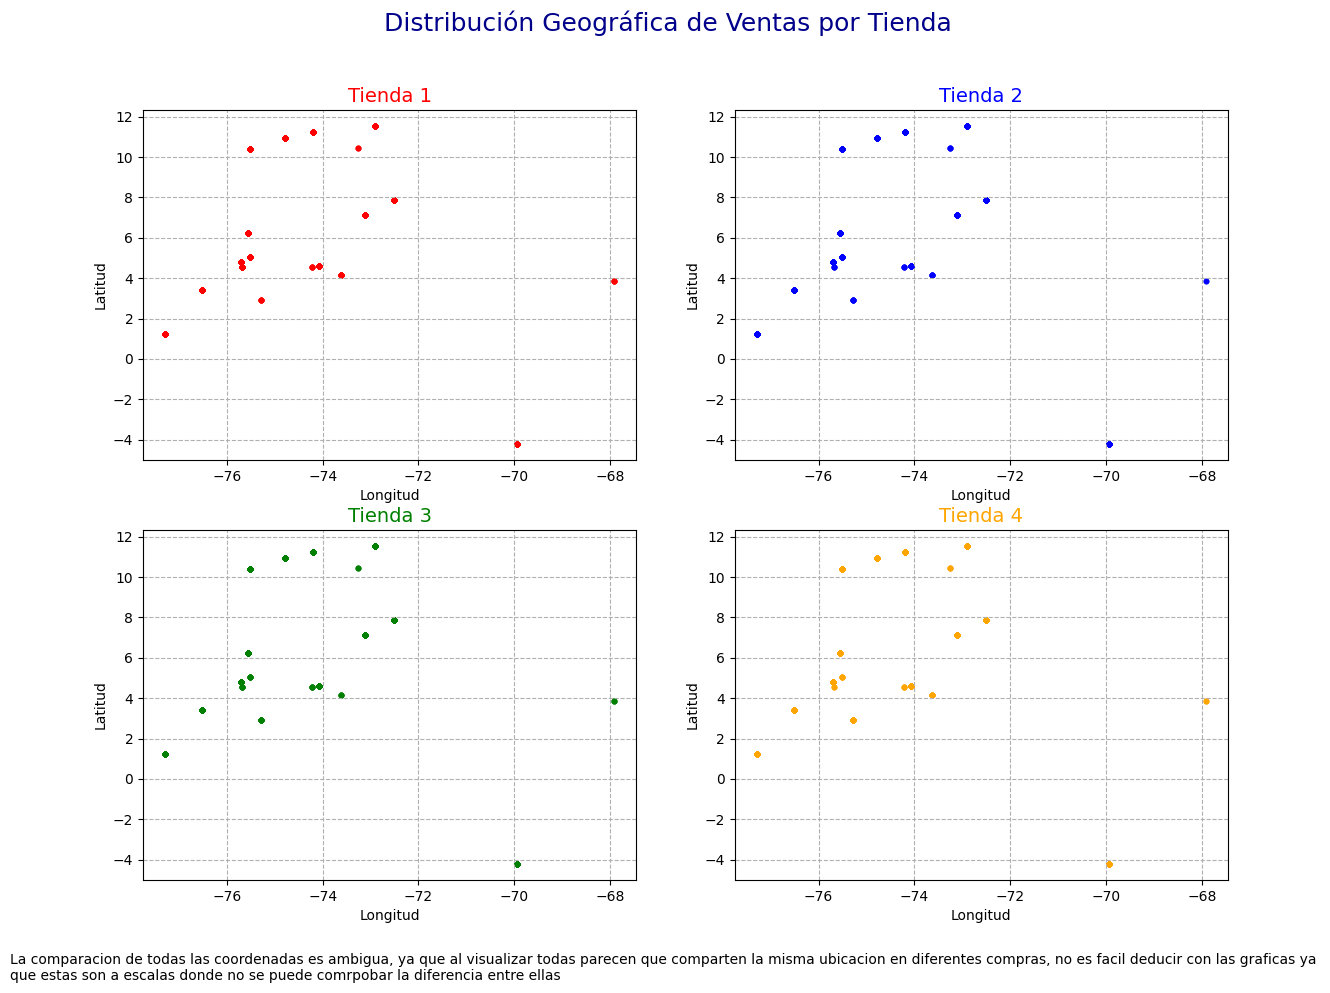

In [182]:
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df = pd.concat([tienda1, tienda2, tienda3, tienda4])

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
#print(axes)
#print(type(axes))
axes = axes.flatten()
#print(axes)
#print(type(axes))

for i in range(len(nombres)):
    tienda = nombres[i]
    color = colores[i]
    datos_tienda = df[df['Tienda'] == tienda]

    axes[i].scatter(
        datos_tienda['lon'],
        datos_tienda['lat'],
        color=color,
        s=10,
        alpha=1
    )
    axes[i].set_title(tienda, fontsize=14, color=color)
    axes[i].set_xlabel('Longitud')
    axes[i].set_ylabel('Latitud')
    axes[i].grid(True, linestyle='--', alpha=1)

fig.suptitle('Distribución Geográfica de Ventas por Tienda', fontsize=18, color='darkblue')
plt.figtext(x=0.03,y=0.01,s='La comparacion de todas las coordenadas es ambigua, ya que al visualizar todas parecen que comparten la misma ubicacion en diferentes compras, no es facil deducir con las graficas ya \nque estas son a escalas donde no se puede comrpobar la diferencia entre ellas')

plt.show()


**En conclusión:**
Podemos observar que la facturación individual la tienda numero 4 (rojo) es la que actualmente factura menos que las demás, aunque en la grafica de pastel refleja que el porcentaje no esta muy alejado de los demás, hablando en mayoreo ese mínimo porcentaje representa sumas de dinero muy grandes, podemos deducir de aquí que las tiendas tienen buenos ingresos dándose competencia entre si sin embargo siempre existirá una que venda menos y veremos a continuación eso.
En ventas por categoría podemos deducir que los ingresos mas fuertes por una gran diferencia son los ‘electrodomésticos’ y los electrónicos, aquí podemos analizar que la tienda 4 es la que menor destaca en ingresos de las 4 tiendas notando una diferencia notable.
En el porcentaje de calificación promedio tenemos que la tienda 1 y la tienda 4 son las que menor calificaciones tienen peleando el puesto por un margen de 0.14% siendo la peor calificada la tienda 1, sin embargo, la tienda 1 posee la mayor facturación, dando como resultado que se debe atender el problema en la tienda 1 en cuestión del servicio para que aumente la calificación y por ende también las ventas por satisfacción, pero la tienda 4 nuevamente está liderando la lista del mejor candidato a vender.
La cuarta grafica da énfasis en que producto es el mas y menos vendido, esta información es importante para la tienda en individual, ya que las compras de productos para stock dependen de que tanto se vende cada producto, es decir, se compra mas producto para venta el cual se venda mas y se compra menos de lo que se vende menos. Aunque nos da datos interesantes para el manejo de stock de cada tienda, no hay mucho que aporte para la decisión de cual vender ya que la diferencia de venta solo son piezas.
Ahora, analizando el promedio de envió de cada tienda tenemos que la tienda 4 posee los mejores precios para el envío, considerando que lo paga el cliente este no afecta económicamente a la tienda, sin embargo, si afecta al precio final del producto haciendo que la competencia pueda asemejar los precios o mejorarlos obteniendo perdidas en ventas en un futuro.
Viendo de un punto objetivo, la tienda 4 es la mejor para ser vendida solo por tener un menor ingresos, pero hay que considerar que tiene mejor logística hablando en envíos ayudando a que los precios de los productos tengan mejor competencia en precio en el mercado, suponiendo que todas las tiendas tienen el mismo tiempo en funcionamiento, la tienda 4 es el mejor candidato para vender y la tienda 1 hay que mejorar los aspectos de envío y calificación para que aumente sus ventas.
